In [1]:
import pandas as pd
from numpy.random import *
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

data = pd.read_csv("dataunklasifikasi.csv")


In [2]:
#kernel trick - kernel linear
data['kernel1']=data['UN Mat']#**2
data['kernel2']=data['UN IPA']#**2
data['kernel3']=sqrt(2)*data['UN Mat']*data['UN IPA']
data.head()

,UN Mat,UN IPA,Klasifikasi,kernel1,kernel2,kernel3
0,76,80,1,76,80,8598.418459
1,81,79,1,81,79,9049.552586
2,76,80,1,76,80,8598.418459
3,79,77,1,79,77,8602.661100
4,81,78,0,81,78,8935.001287


In [3]:
C=0.001
epochs = 200000
alpha  = 0.00001
seed(2020)

X=data.values
# initialize neural network weights
W0    = 0
W1    = randn(1)
W2    = randn(1)
W3    = randn(1)
print(W1)
print(W2)
print(W3)

[-1.76884571]
[0.07555227]
[-1.1306297]


In [4]:
#label
Y=X[:,2]
Y=where(Y <= 0, -1, 1)
loss_history=[]
W0_all=[]
W1_all=[]
W2_all=[]
W3_all=[]
for n in range(epochs):
    # Forward propagation
    Z = Y*(W1*X[:,3] + W2*X[:,4] + W3*X[:,5] + W0)
    E = where(Z<1)[0]
    loss = (1/2) * (W1*W1+W2*W2+W3*W3) + C*sum(maximum(0,1-Z))
    loss_history.append(loss)
    
    # Backward propagation

    dW0=-C*sum(Y[E])
    dW1=W1-C*(Y[E].reshape(len(E),1).T@X[E,3])
    dW2=W2-C*(Y[E].reshape(len(E),1).T@X[E,4])
    dW3=W3-C*(Y[E].reshape(len(E),1).T@X[E,5])
    
    #updating parameter
    W0 -= alpha*dW0
    W0_all.append(W0)
    
    W1 -= alpha*dW1
    W1_all=append(W1_all,W1)
    
    W2 -= alpha*dW2    
    W2_all=append(W2_all,W2)
    
    W3 -= alpha*dW3    
    W3_all=append(W3_all,W3)

support=where(Z<=1)[0]

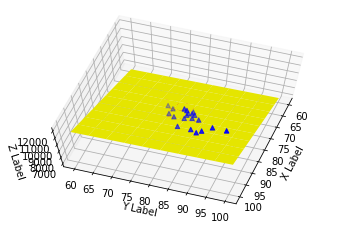

In [5]:
#plotting 3D
n_0=len(where(data['Klasifikasi']==0)[0])
n_1=len(where(data['Klasifikasi']==1)[0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs=zeros((n_0))
ys=zeros((n_0))
zs=zeros((n_0))
j=0
for i in range (len(data)):
    if data['Klasifikasi'][i]==0:
        xs[j]=data['kernel1'][i]
        ys[j]=data['kernel2'][i]
        zs[j]=data['kernel3'][i]
        j+=1

xt=zeros((n_1))
yt=zeros((n_1))
zt=zeros((n_1))
j=0
for i in range (len(data)):
    if data['Klasifikasi'][i]==1:
        xt[j]=data['kernel1'][i]
        yt[j]=data['kernel2'][i]
        zt[j]=data['kernel3'][i]
        j+=1

z = lambda x,y: (-W1*x-W2*y-W0) / W3
tmp = linspace(60,100,10)
x,y = meshgrid(tmp,tmp)
        
ax.scatter(xs, ys, zs, c='r', marker='o')
ax.scatter(xt, yt, zt, c='b', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.plot_surface(x, y, z(x,y),color='yellow')
ax.view_init(70, 19)

plt.show()

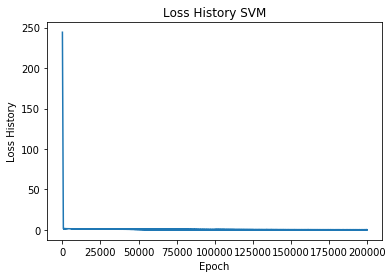

In [6]:
#plot loss history
step=[*range(1,200001)]

plt.plot(step, loss_history)
plt.title('Loss History SVM')
plt.xlabel('Epoch')
plt.ylabel('Loss History')
plt.show()

In [7]:
# knowing the points side of the plane
x=75
y=75
z=(-x*W1-y*W2-W0)/W3
check=W1*(X[:,3]-x)+W2*(X[:,4]-y)+W3*(X[:,5]-z)
which_side=zeros((len(check)))
for i in range (len(check)):
    if check[i]>=0:
        which_side[i]=1

In [8]:
#akurasi: kecocokan algoritma dengan label asli
e=sum(abs(which_side-X[:,2]))
akurasi=(len(X)-e)/len(X)
print(akurasi)

0.7209302325581395
